In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix


from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

Member id  SEC  FEH  MT  SEX  AGE  EDU  HS  CHILD  CS  ...  PropCat 6  \
0      1010010    4    3  10    1    4    4   2      4   1  ...         0%   
1      1010020    3    2  10    2    2    4   4      2   1  ...        35%   
2      1014020    2    3  10    2    4    5   6      4   1  ...        12%   
3      1014030    4    0   0    0    4    0   0      5   0  ...         0%   
4      1014190    4    1  10    2    3    4   4      3   1  ...         0%   
..         ...  ...  ...  ..  ...  ...  ...  ..    ...  ..  ...        ...   
595    1167090    2    3  10    2    4    5   5      4   1  ...         0%   
596    1167230    3    3  10    2    3    5   4      4   1  ...        43%   
597    1167340    3    3  17    2    4    4   9      4   1  ...        13%   
598    1167350    2    1   4    2    4    5   2      4   2  ...        15%   
599    1167670    3    3  10    2    4    4   6      4   1  ...         0%   

     PropCat 7  PropCat 8  PropCat 9  PropCat 10  PropCat 11  PropCat 12  \
0           0%         0%         0%          0%          0%          3%   
1           3%         2%         1%          0%          6%          0%   
2           3%         1%         1%          0%          0%          2%   
3           0%         0%         0%          0%          0%          0%   
4           0%         5%         0%          0%          0%          0%   
..         ...        ...        ...         ...         ...         ...   
595         0%         0%         0%          2%         90%          0%   
596         7%        15%         0%          4%          0%          0%   
597         0%         3%         0%          4%          0%          0%   
598         0%         0%         0%          0%          0%          0%   
599         0%         0%         0%          0%          0%          0%   

     PropCat 13  PropCat 14 PropCat 15  
0            0%         13%        34%  
1            0%          8%         0%  
2            0%         56%         0%  
3            0%         60%         0%  
4            0%         14%         0%  
..          ...         ...        ...  
595          0%          0%         0%  
596          9%          0%         5%  
597          0%         18%         0%  
598          3%         14%         0%  
599          0%          0%         0%  

[600 rows x 46 columns]

Kmeans clustering can only handle numeric data. Thus all the percentages need to be converted over to a numeric value by removing the percent symbol and converting them to floating point numbers.

In [330]:
altData = pd.read_csv("BathSoap.csv")

altData = altData.drop(['Member id'], axis=1)
altData = altData.dropna()

altData['Pur Vol No Promo - %']  = altData['Pur Vol No Promo - %'].apply(lambda x: float(x[:-1]) / 100)
altData['Pur Vol Promo 6 %']     = altData['Pur Vol Promo 6 %'].apply(lambda x: float(x[:-1]) / 100)
altData['Pur Vol Other Promo %'] = altData['Pur Vol Other Promo %'].apply(lambda x: float(x[:-1]) / 100)
altData['Br. Cd. 57, 144']       = altData['Br. Cd. 57, 144'].apply(lambda x: float(x[:-1]) / 100)
altData['Br. Cd. 55']            = altData['Br. Cd. 55'].apply(lambda x: float(x[:-1]) / 100)
altData['Br. Cd. 272']           = altData['Br. Cd. 272'].apply(lambda x: float(x[:-1]) / 100)
altData['Br. Cd. 286']           = altData['Br. Cd. 286'].apply(lambda x: float(x[:-1]) / 100)
altData['Br. Cd. 24']            = altData['Br. Cd. 24'].apply(lambda x: float(x[:-1]) / 100)
altData['Br. Cd. 481']           = altData['Br. Cd. 481'].apply(lambda x: float(x[:-1]) / 100)
altData['Br. Cd. 352']           = altData['Br. Cd. 352'].apply(lambda x: float(x[:-1]) / 100)
altData['Br. Cd. 5']             = altData['Br. Cd. 5'].apply(lambda x: float(x[:-1]) / 100)
altData['Others 999']            = altData['Others 999'].apply(lambda x: float(x[:-1]) / 100)

altData['Pr Cat 1'] = altData['Pr Cat 1'].apply(lambda x: float(x[:-1]) / 100)
altData['Pr Cat 2'] = altData['Pr Cat 2'].apply(lambda x: float(x[:-1]) / 100)
altData['Pr Cat 3'] = altData['Pr Cat 3'].apply(lambda x: float(x[:-1]) / 100)
altData['Pr Cat 4'] = altData['Pr Cat 4'].apply(lambda x: float(x[:-1]) / 100)

altData['PropCat 5']  = altData['PropCat 5'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 6']  = altData['PropCat 6'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 7']  = altData['PropCat 7'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 8']  = altData['PropCat 8'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 9']  = altData['PropCat 9'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 10'] = altData['PropCat 10'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 11'] = altData['PropCat 11'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 12'] = altData['PropCat 12'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 13'] = altData['PropCat 13'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 14'] = altData['PropCat 14'].apply(lambda x: float(x[:-1]) / 100)
altData['PropCat 15'] = altData['PropCat 15'].apply(lambda x: float(x[:-1]) / 100)


# Create a new varaible representing the loyalty to a brand with the most purchase percentage of the listed brands (Excludes other brands). 

temp = altData.loc[:, ["Br. Cd. 57, 144", "Br. Cd. 55", "Br. Cd. 272", "Br. Cd. 286", "Br. Cd. 24", "Br. Cd. 24", "Br. Cd. 352", "Br. Cd. 5"]]

altData['brandLoyalty'] = temp.max(axis=1) / temp.sum(axis=1)
altData['brandLoyalty'] = altData['brandLoyalty'].fillna(0)

    
cols_to_norm = [
# "SEC",
# "MT",
# "AGE",
# "EDU",
# "HS",
# "Affluence Index",
"No. of Brands",
"Brand Runs",
"Total Volume",
"No. of  Trans",
"Value",
"Trans / Brand Runs",
"Vol/Tran",
"Avg. Price",
"Pur Vol No Promo - %",
"Pur Vol Promo 6 %",
"Pur Vol Other Promo %",
"Br. Cd. 57, 144",
"Br. Cd. 55",
"Br. Cd. 272",
"Br. Cd. 286",
"Br. Cd. 24",
"Br. Cd. 481",
"Br. Cd. 352",
"Br. Cd. 5",
"Others 999",

"Pr Cat 1",
"Pr Cat 2",
"Pr Cat 3",
"Pr Cat 4",

"PropCat 5",
"PropCat 6",
"PropCat 7",
"PropCat 8",
"PropCat 9",
"PropCat 10",
"PropCat 11",
"PropCat 12",
"PropCat 13",
"PropCat 14",
"PropCat 15",
"brandLoyalty"
]

altData[cols_to_norm] = altData[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

The data is split into groups for analysis. Each group will be tested individually as a clustering input 

In [333]:
purchaseBehaviorDerived = altData.loc[:, [
"No. of Brands",
"Brand Runs",
"Total Volume",
"No. of  Trans",
"Value",
"Trans / Brand Runs",
"Vol/Tran",
"Avg. Price",
"Pur Vol No Promo - %",
"Pur Vol Promo 6 %",
"Pur Vol Other Promo %",
# "Others 999",
"brandLoyalty"]]

propCat  = altData.loc[:,[
"PropCat 5",
"PropCat 6",
"PropCat 7",
"PropCat 8",
"PropCat 9",
"PropCat 10",
"PropCat 11",
"PropCat 12",
"PropCat 13",
"PropCat 14",
"PropCat 15"]]

priceCat  = altData.loc[:,[
"Pr Cat 1",
"Pr Cat 2",
"Pr Cat 3",
"Pr Cat 4"]]

basisForPurchase  = altData.loc[:,[
"PropCat 5",
"PropCat 6",
"PropCat 7",
"PropCat 8",
"PropCat 9",
"PropCat 10",
"PropCat 11",
"PropCat 12",
"PropCat 13",
"PropCat 14",
"PropCat 15",
"Pr Cat 1",
"Pr Cat 2",
"Pr Cat 3",
"Pr Cat 4"]]

both = altData.loc[:,[
"No. of Brands",
"Brand Runs",
"Total Volume",
"No. of  Trans",
"Value",
"Trans / Brand Runs",
"Vol/Tran",
"Avg. Price",
"Pur Vol No Promo - %",
"Pur Vol Promo 6 %",
"Pur Vol Other Promo %",
"PropCat 5",
"PropCat 6",
"PropCat 7",
"PropCat 8",
"PropCat 9",
"PropCat 10",
"PropCat 11",
"PropCat 12",
"PropCat 13",
"PropCat 14",
"PropCat 15",
"Pr Cat 1",
"Pr Cat 2",
"Pr Cat 3",
"Pr Cat 4",
# "Others 999",
"brandLoyalty"]]


The following sections are the methods used to identify the ideal number of clusters.

For n_clusters = 2 The average silhouette_score is : 0.2597175613218027
For n_clusters = 3 The average silhouette_score is : 0.2719857051699841
For n_clusters = 4 The average silhouette_score is : 0.2346373107959679
For n_clusters = 5 The average silhouette_score is : 0.265280244184188


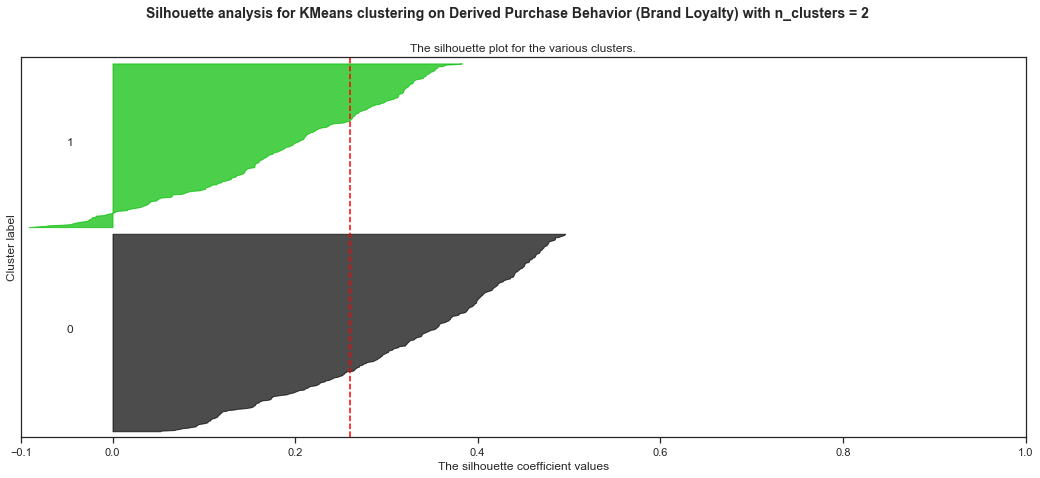

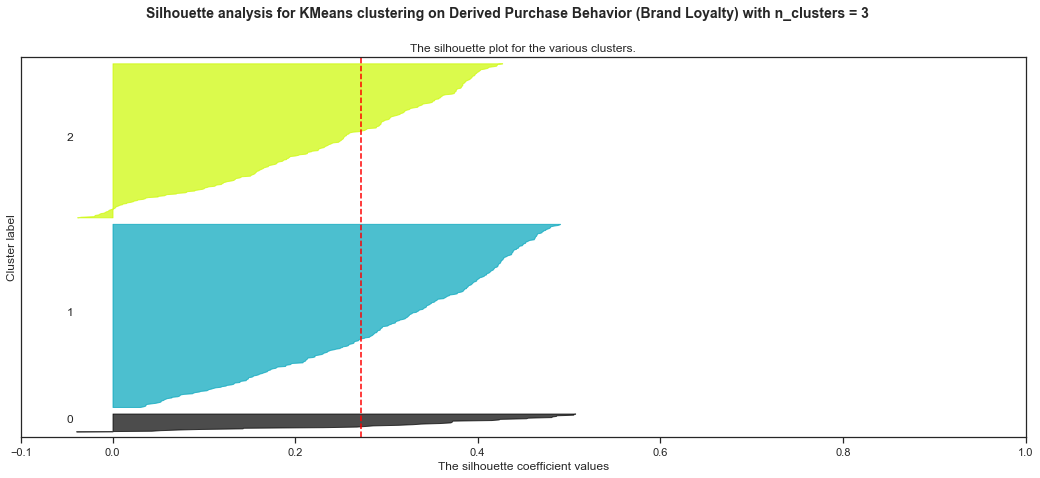

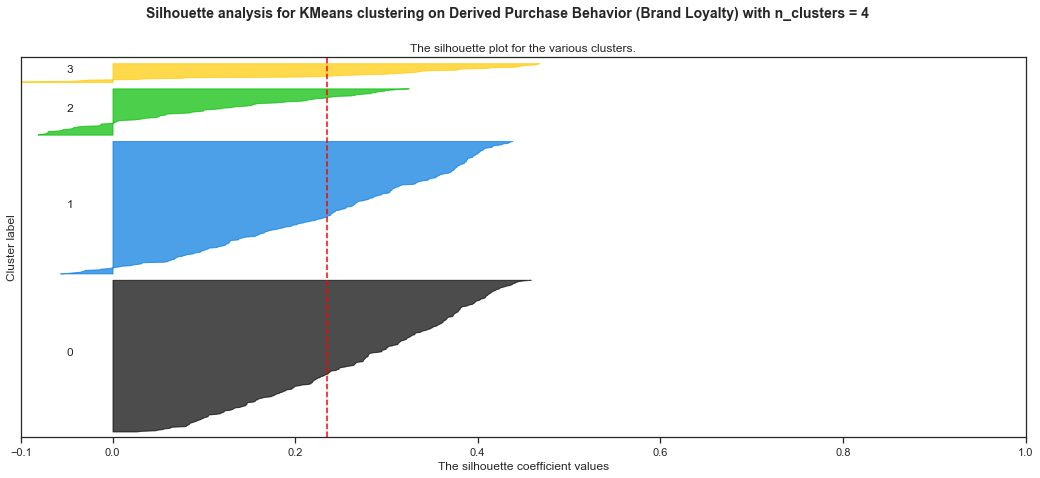

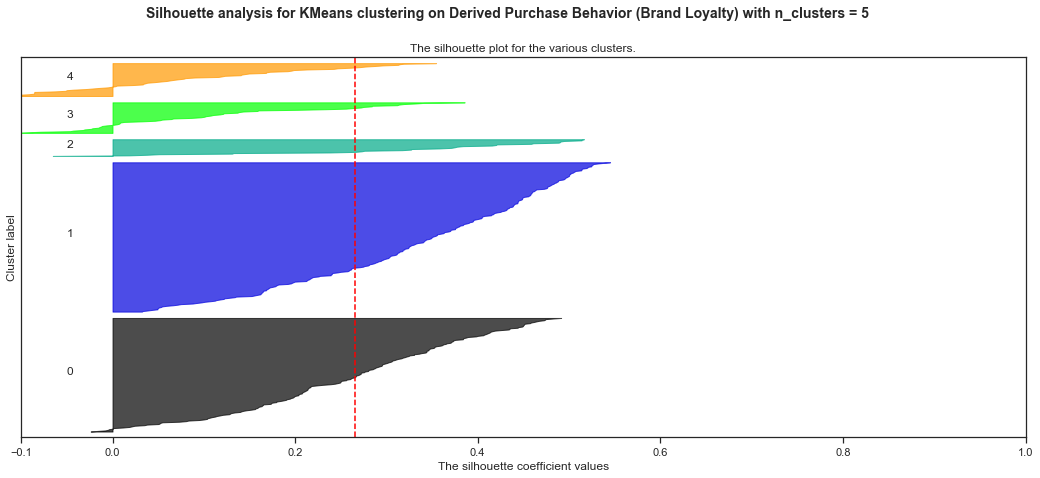

In [334]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    X = purchaseBehaviorDerived
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on Derived Purchase Behavior (Brand Loyalty) "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.30784011436080627
For n_clusters = 3 The average silhouette_score is : 0.33878196420200446
For n_clusters = 4 The average silhouette_score is : 0.35642026486815864
For n_clusters = 5 The average silhouette_score is : 0.3697269869409852


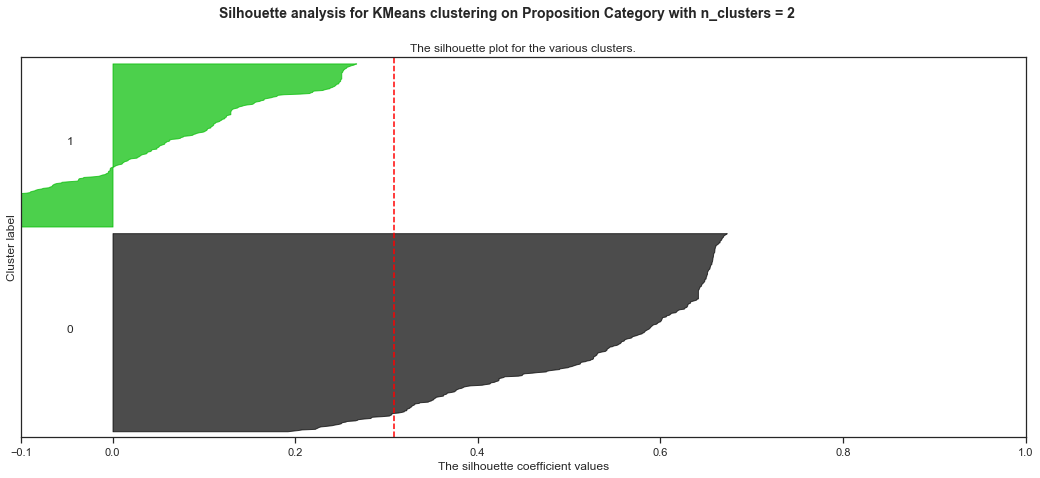

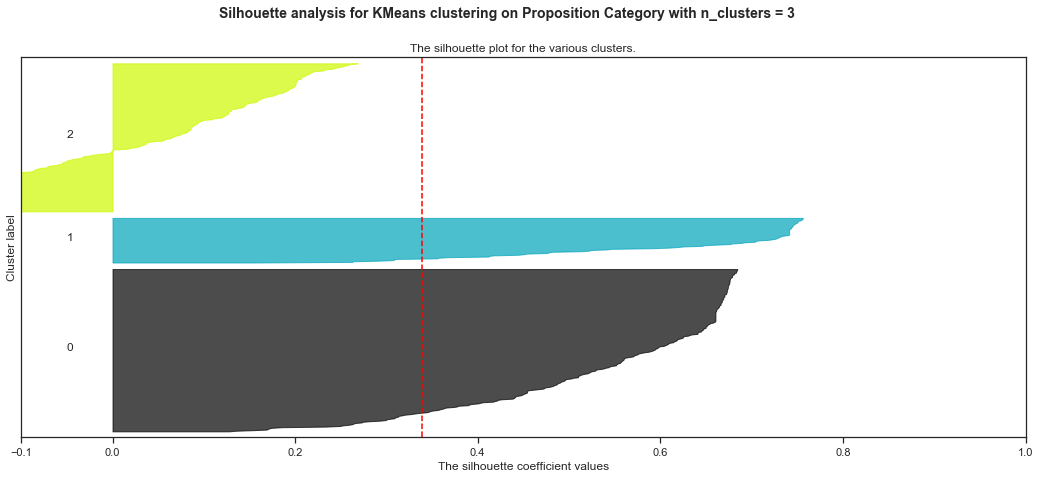

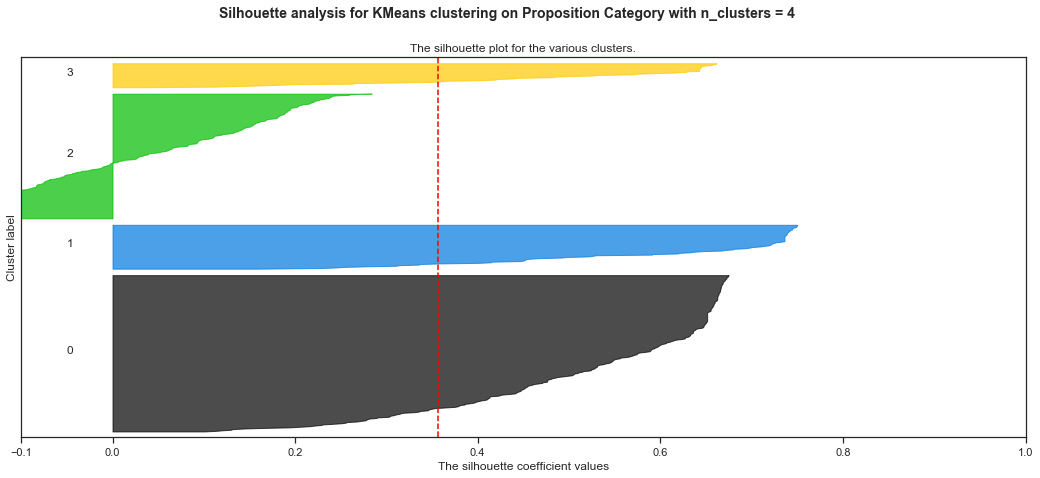

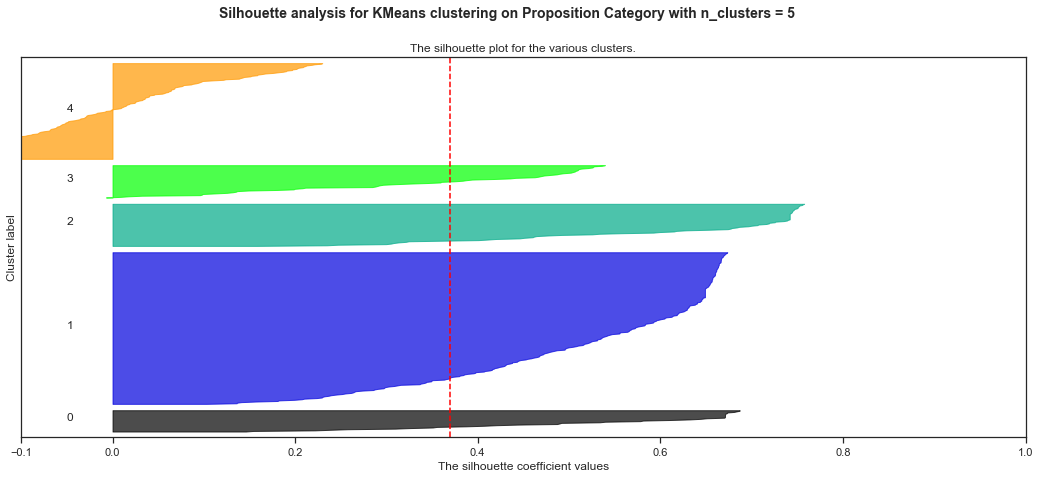

In [335]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    X = propCat
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on Proposition Category "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3991514924267952
For n_clusters = 3 The average silhouette_score is : 0.4942039332477905
For n_clusters = 4 The average silhouette_score is : 0.5627934024187058
For n_clusters = 5 The average silhouette_score is : 0.46228061007413174


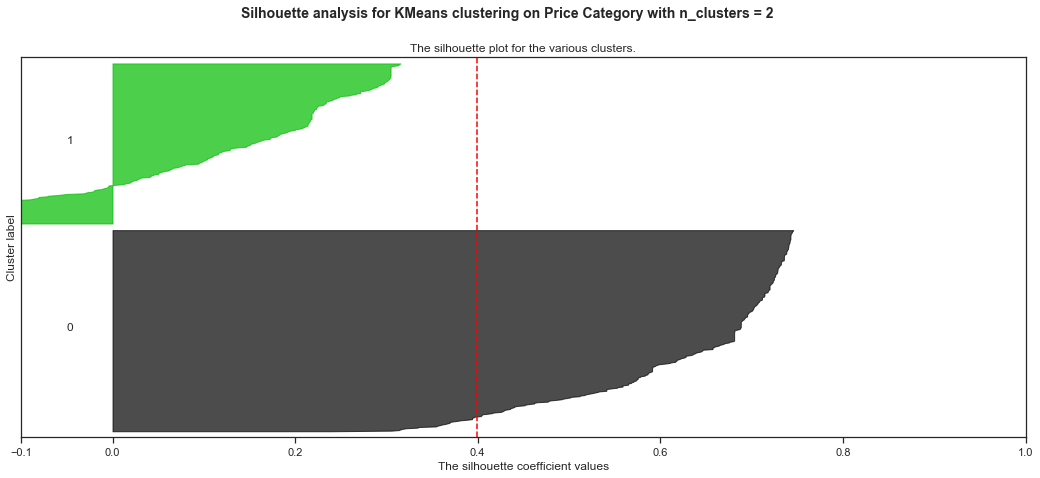

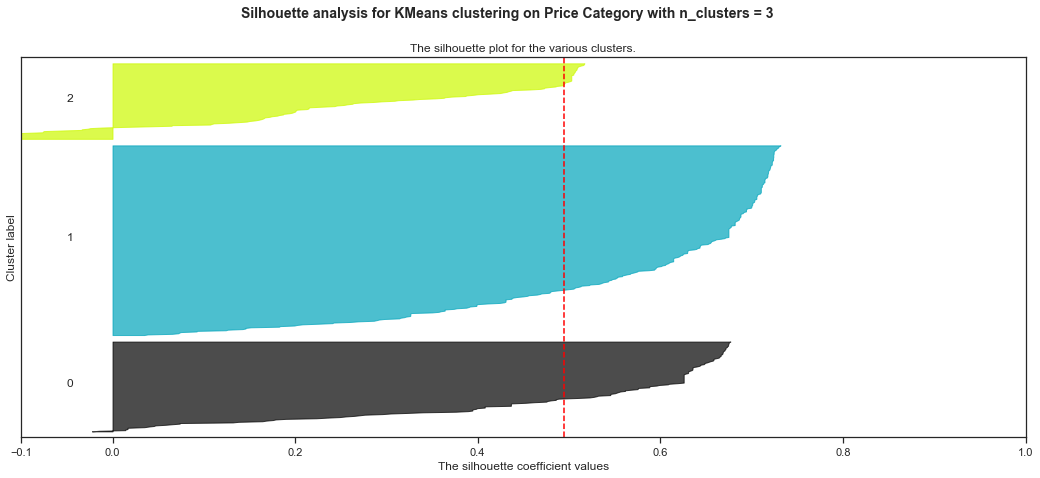

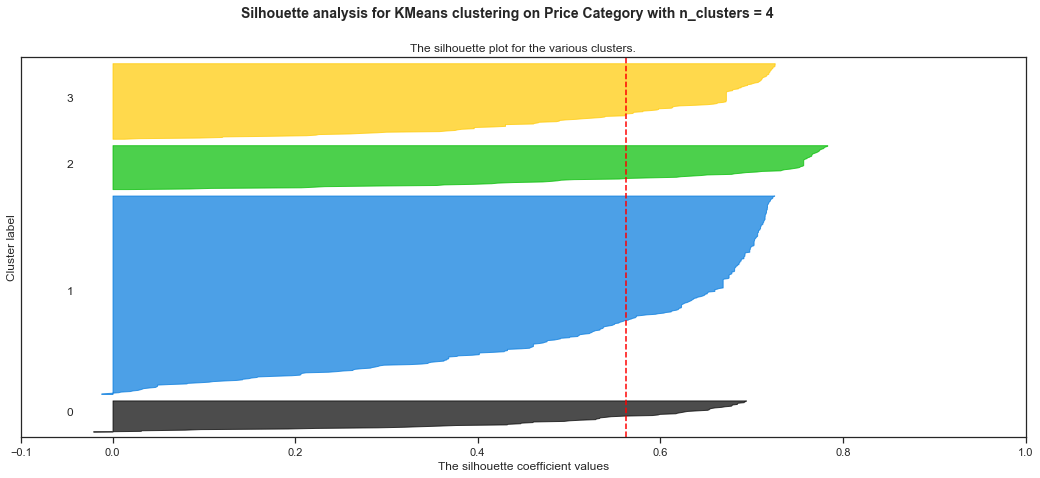

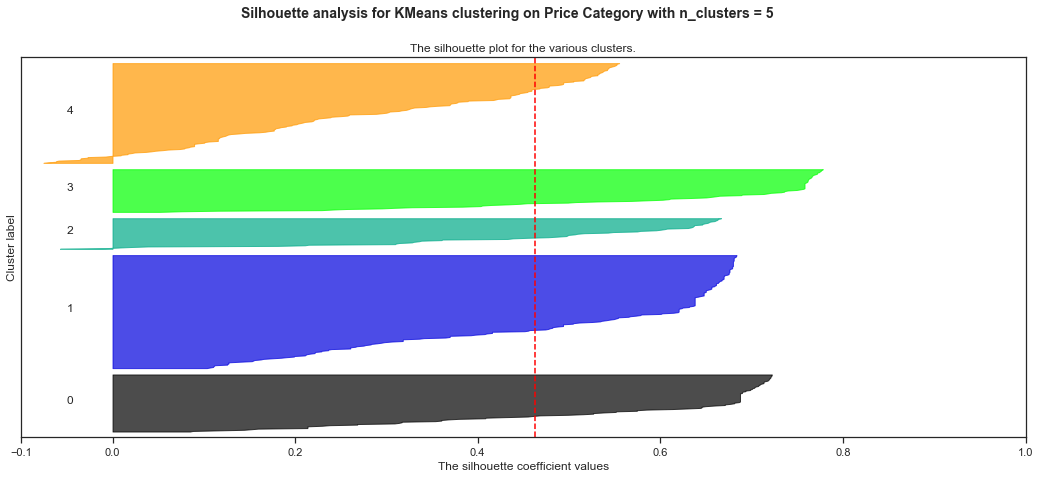

In [336]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    X = priceCat
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on Price Category "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.37941434690809034
For n_clusters = 3 The average silhouette_score is : 0.29851004194995395
For n_clusters = 4 The average silhouette_score is : 0.31032667676984577
For n_clusters = 5 The average silhouette_score is : 0.289900939773538


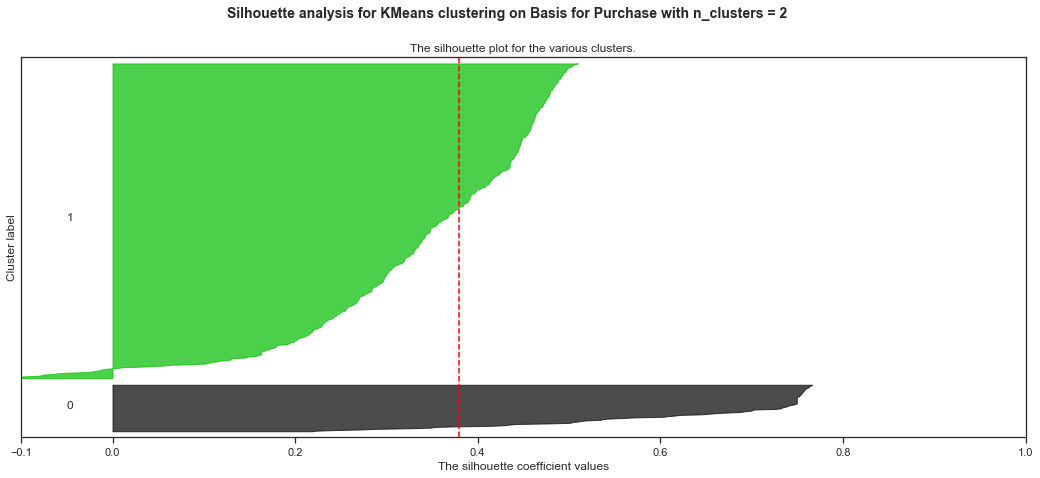

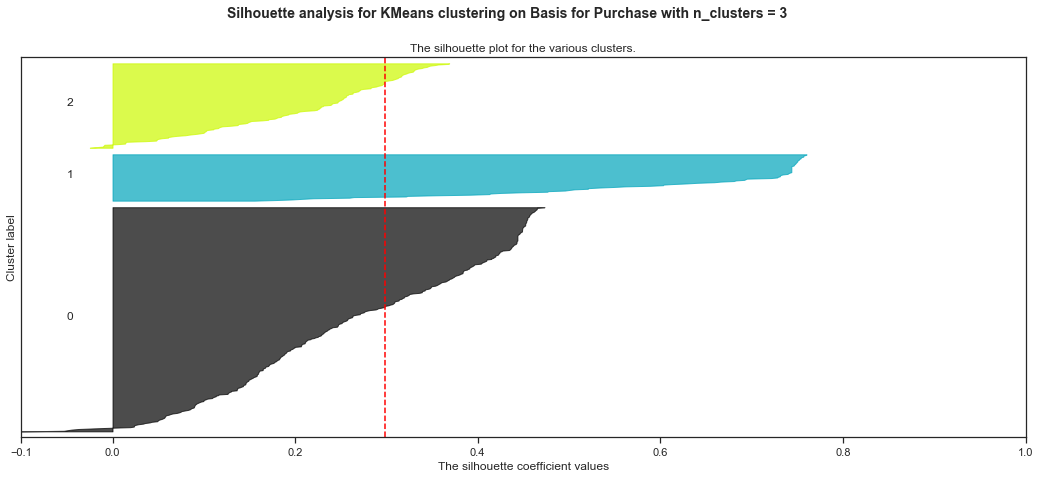

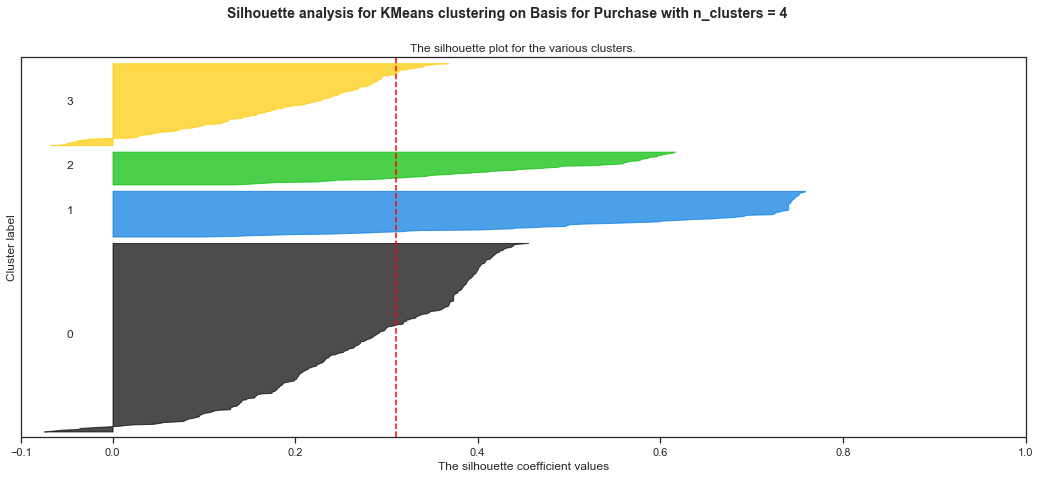

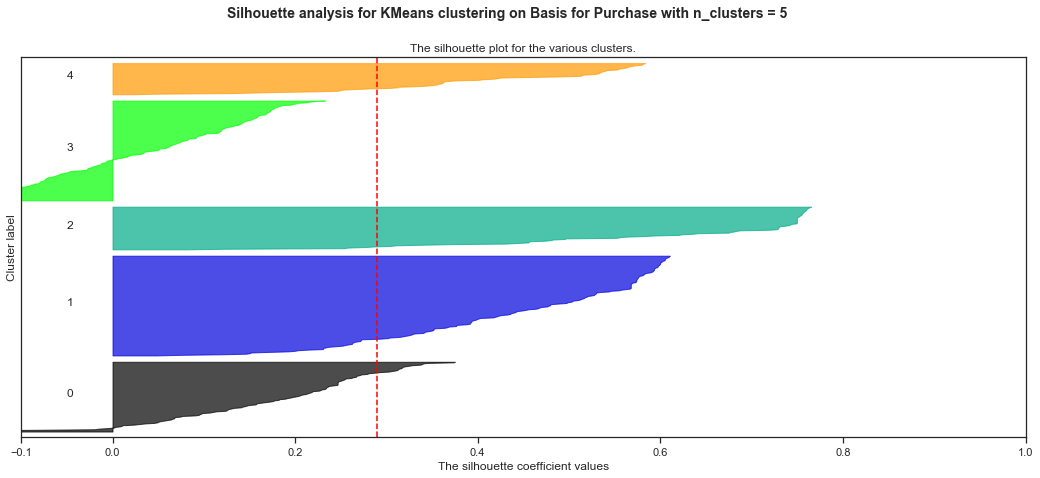

In [337]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    X = basisForPurchase
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on Basis for Purchase "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.30390892227256316
For n_clusters = 3 The average silhouette_score is : 0.22353705884450487
For n_clusters = 4 The average silhouette_score is : 0.1889980215121062
For n_clusters = 5 The average silhouette_score is : 0.20246544661100807


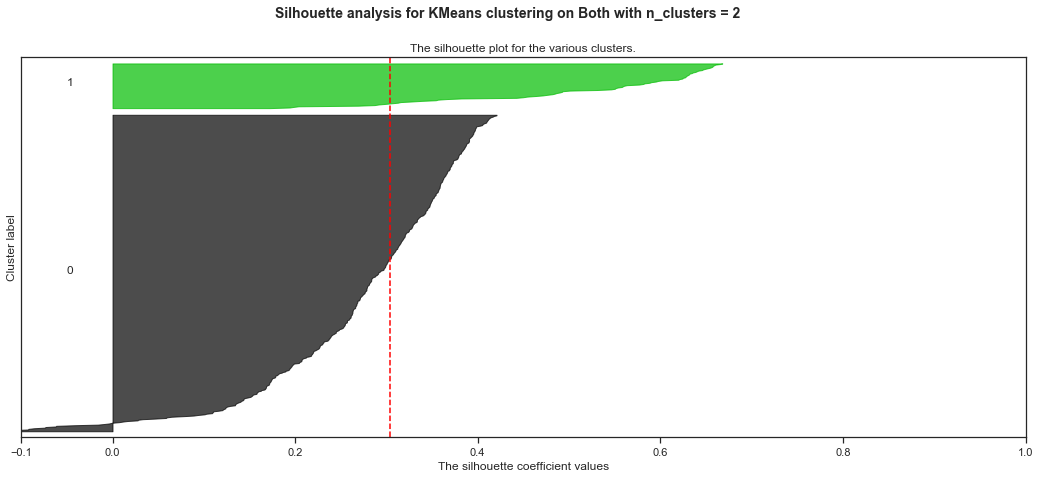

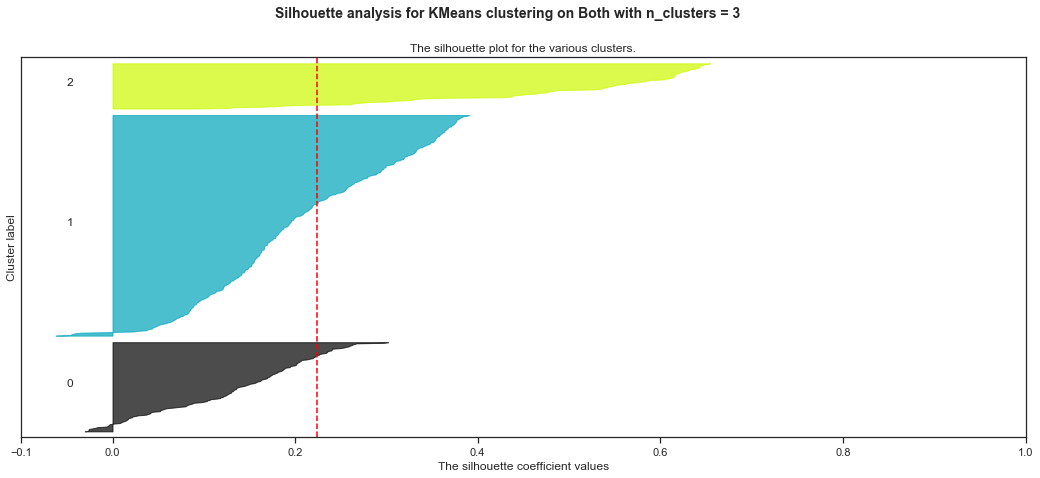

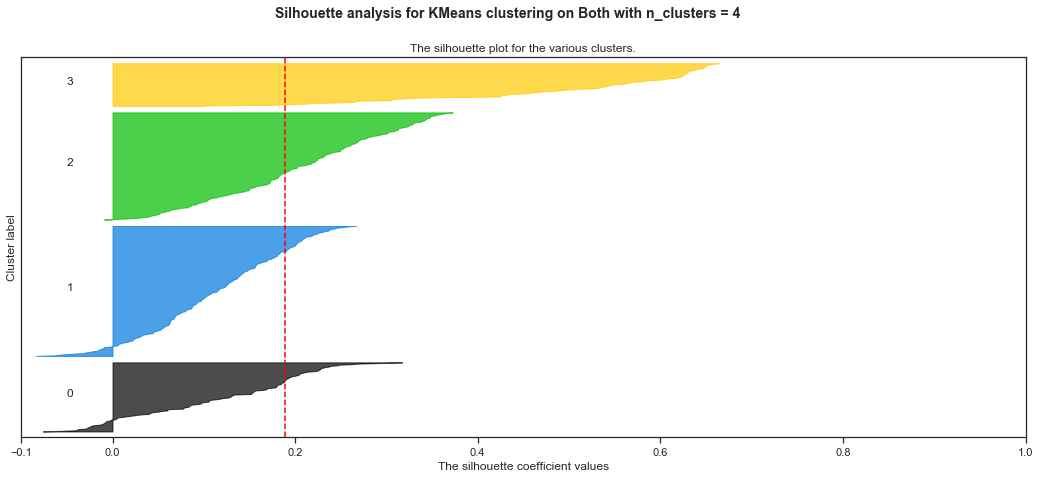

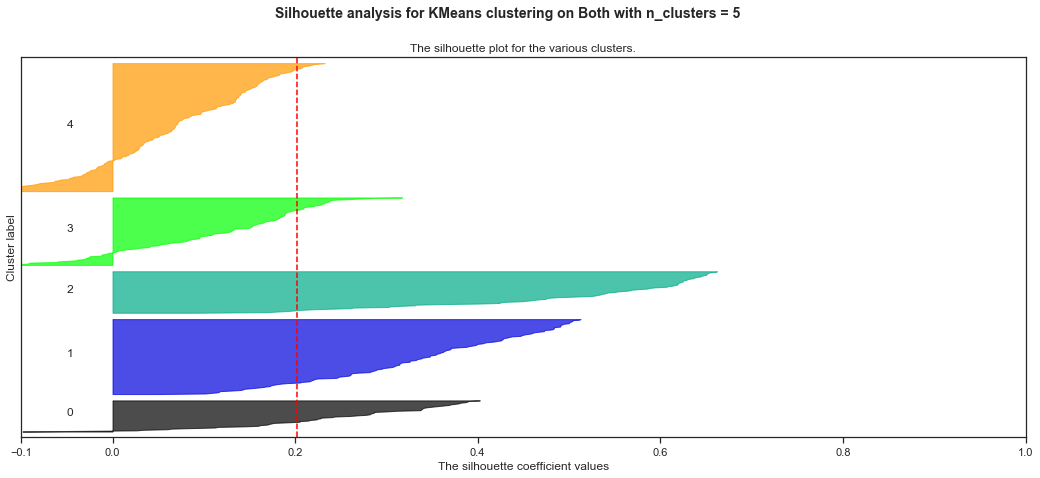

In [338]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    X = both
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on Both "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Three clusters was selected becuase it scored the highest on the purchase behavior, but it also scored well across the other categories. 
Purchase behavior is the most important group of factors here because it includes the computed brand loyalty variable.

In [339]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(purchaseBehaviorDerived)
allData['preds'] = kmeans.predict(purchaseBehaviorDerived)
# sns.pairplot(purchaseBehaviorDerived, hue='preds')

In [340]:
demos = allData.loc[:,[
"SEC",
"MT",
"AGE",
"EDU",
"HS",
"Affluence Index",
"preds"
]]

purchaseBehaviorDerived = allData.loc[:, [
"No. of Brands",
"Brand Runs",
"Total Volume",
"No. of  Trans",
"Value",
"Trans / Brand Runs",
"Vol/Tran",
"Avg. Price",
"Pur Vol No Promo - %",
"Pur Vol Promo 6 %",
"Pur Vol Other Promo %",
# "Others 999",
"brandLoyalty",
"preds"
]]

propCat  = allData.loc[:,[
"PropCat 5",
"PropCat 6",
"PropCat 7",
"PropCat 8",
"PropCat 9",
"PropCat 10",
"PropCat 11",
"PropCat 12",
"PropCat 13",
"PropCat 14",
"PropCat 15",
"preds"
]]

priceCat  = allData.loc[:,[
"Pr Cat 1",
"Pr Cat 2",
"Pr Cat 3",
"Pr Cat 4",
"preds"
]]




In [341]:
allData

SEC  MT  AGE  EDU  HS  Affluence Index  No. of Brands  Brand Runs  \
0      4  10    4    4   2                2          0.250    0.219178   
1      3  10    2    4   4               19          0.500    0.328767   
2      2  10    4    5   6               23          0.500    0.493151   
3      4   0    4    0   0                0          0.125    0.041096   
4      4  10    3    4   4               10          0.250    0.068493   
..   ...  ..  ...  ...  ..              ...            ...         ...   
595    2  10    4    5   5               15          0.250    0.054795   
596    3  10    3    5   4               29          0.500    0.301370   
597    3  17    4    4   9               13          0.375    0.246575   
598    2   4    4    5   2               20          0.250    0.191781   
599    3  10    4    4   6               15          0.250    0.109589   

     Total Volume  No. of  Trans  ...  PropCat 8  PropCat 9  PropCat 10  \
0        0.155188       0.167883  ...   0.000000    0.00000        0.00   
1        0.272441       0.284672  ...   0.020833    0.02439        0.00   
2        0.452261       0.452555  ...   0.010417    0.02439        0.00   
3        0.026604       0.021898  ...   0.000000    0.00000        0.00   
4        0.160607       0.087591  ...   0.052083    0.00000        0.00   
..            ...            ...  ...        ...        ...         ...   
595      0.174894       0.153285  ...   0.000000    0.00000        0.02   
596      0.096561       0.197080  ...   0.156250    0.00000        0.04   
597      0.570500       0.175182  ...   0.031250    0.00000        0.04   
598      0.105429       0.131387  ...   0.000000    0.00000        0.00   
599      0.239432       0.094891  ...   0.000000    0.00000        0.00   

     PropCat 11  PropCat 12  PropCat 13  PropCat 14  PropCat 15  brandLoyalty  \
0      0.000000    0.090909        0.00        0.13    0.404762      0.745098   
1      0.066667    0.000000        0.00        0.08    0.000000      0.583333   
2      0.000000    0.060606        0.00        0.56    0.000000      0.873016   
3      0.000000    0.000000        0.00        0.60    0.000000      0.600000   
4      0.000000    0.000000        0.00        0.14    0.000000      0.736842   
..          ...         ...         ...         ...         ...           ...   
595    1.000000    0.000000        0.00        0.00    0.000000      1.000000   
596    0.000000    0.000000        0.09        0.00    0.059524      0.243902   
597    0.000000    0.000000        0.00        0.18    0.000000      0.555556   
598    0.000000    0.000000        0.03        0.14    0.000000      0.647059   
599    0.000000    0.000000        0.00        0.00    0.000000      0.707317   

     preds  
0        0  
1        1  
2        1  
3        0  
4        0  
..     ...  
595      0  
596      1  
597      1  
598      0  
599      0  

[600 rows x 43 columns]

Below are a few plots showing the relationship between the variables. 

The first plot shows the relationship between the variables used to cluster the data. The three clusters are: Thrift Shoppers, Average Customers, and Loyal Customers.

Thrift shoppers choose only a few brands and don't buy very often. When they do buy it is often of a very small quantity.
Average customers cover the most diverse area of the plot. However they are not very loyal (inbetween thrift and loyal customers). Average customers also purchase the most product in the largest quantity
Loyal customers stick with their brands and even if they do happen to buy other products they eventually return to their main brand.

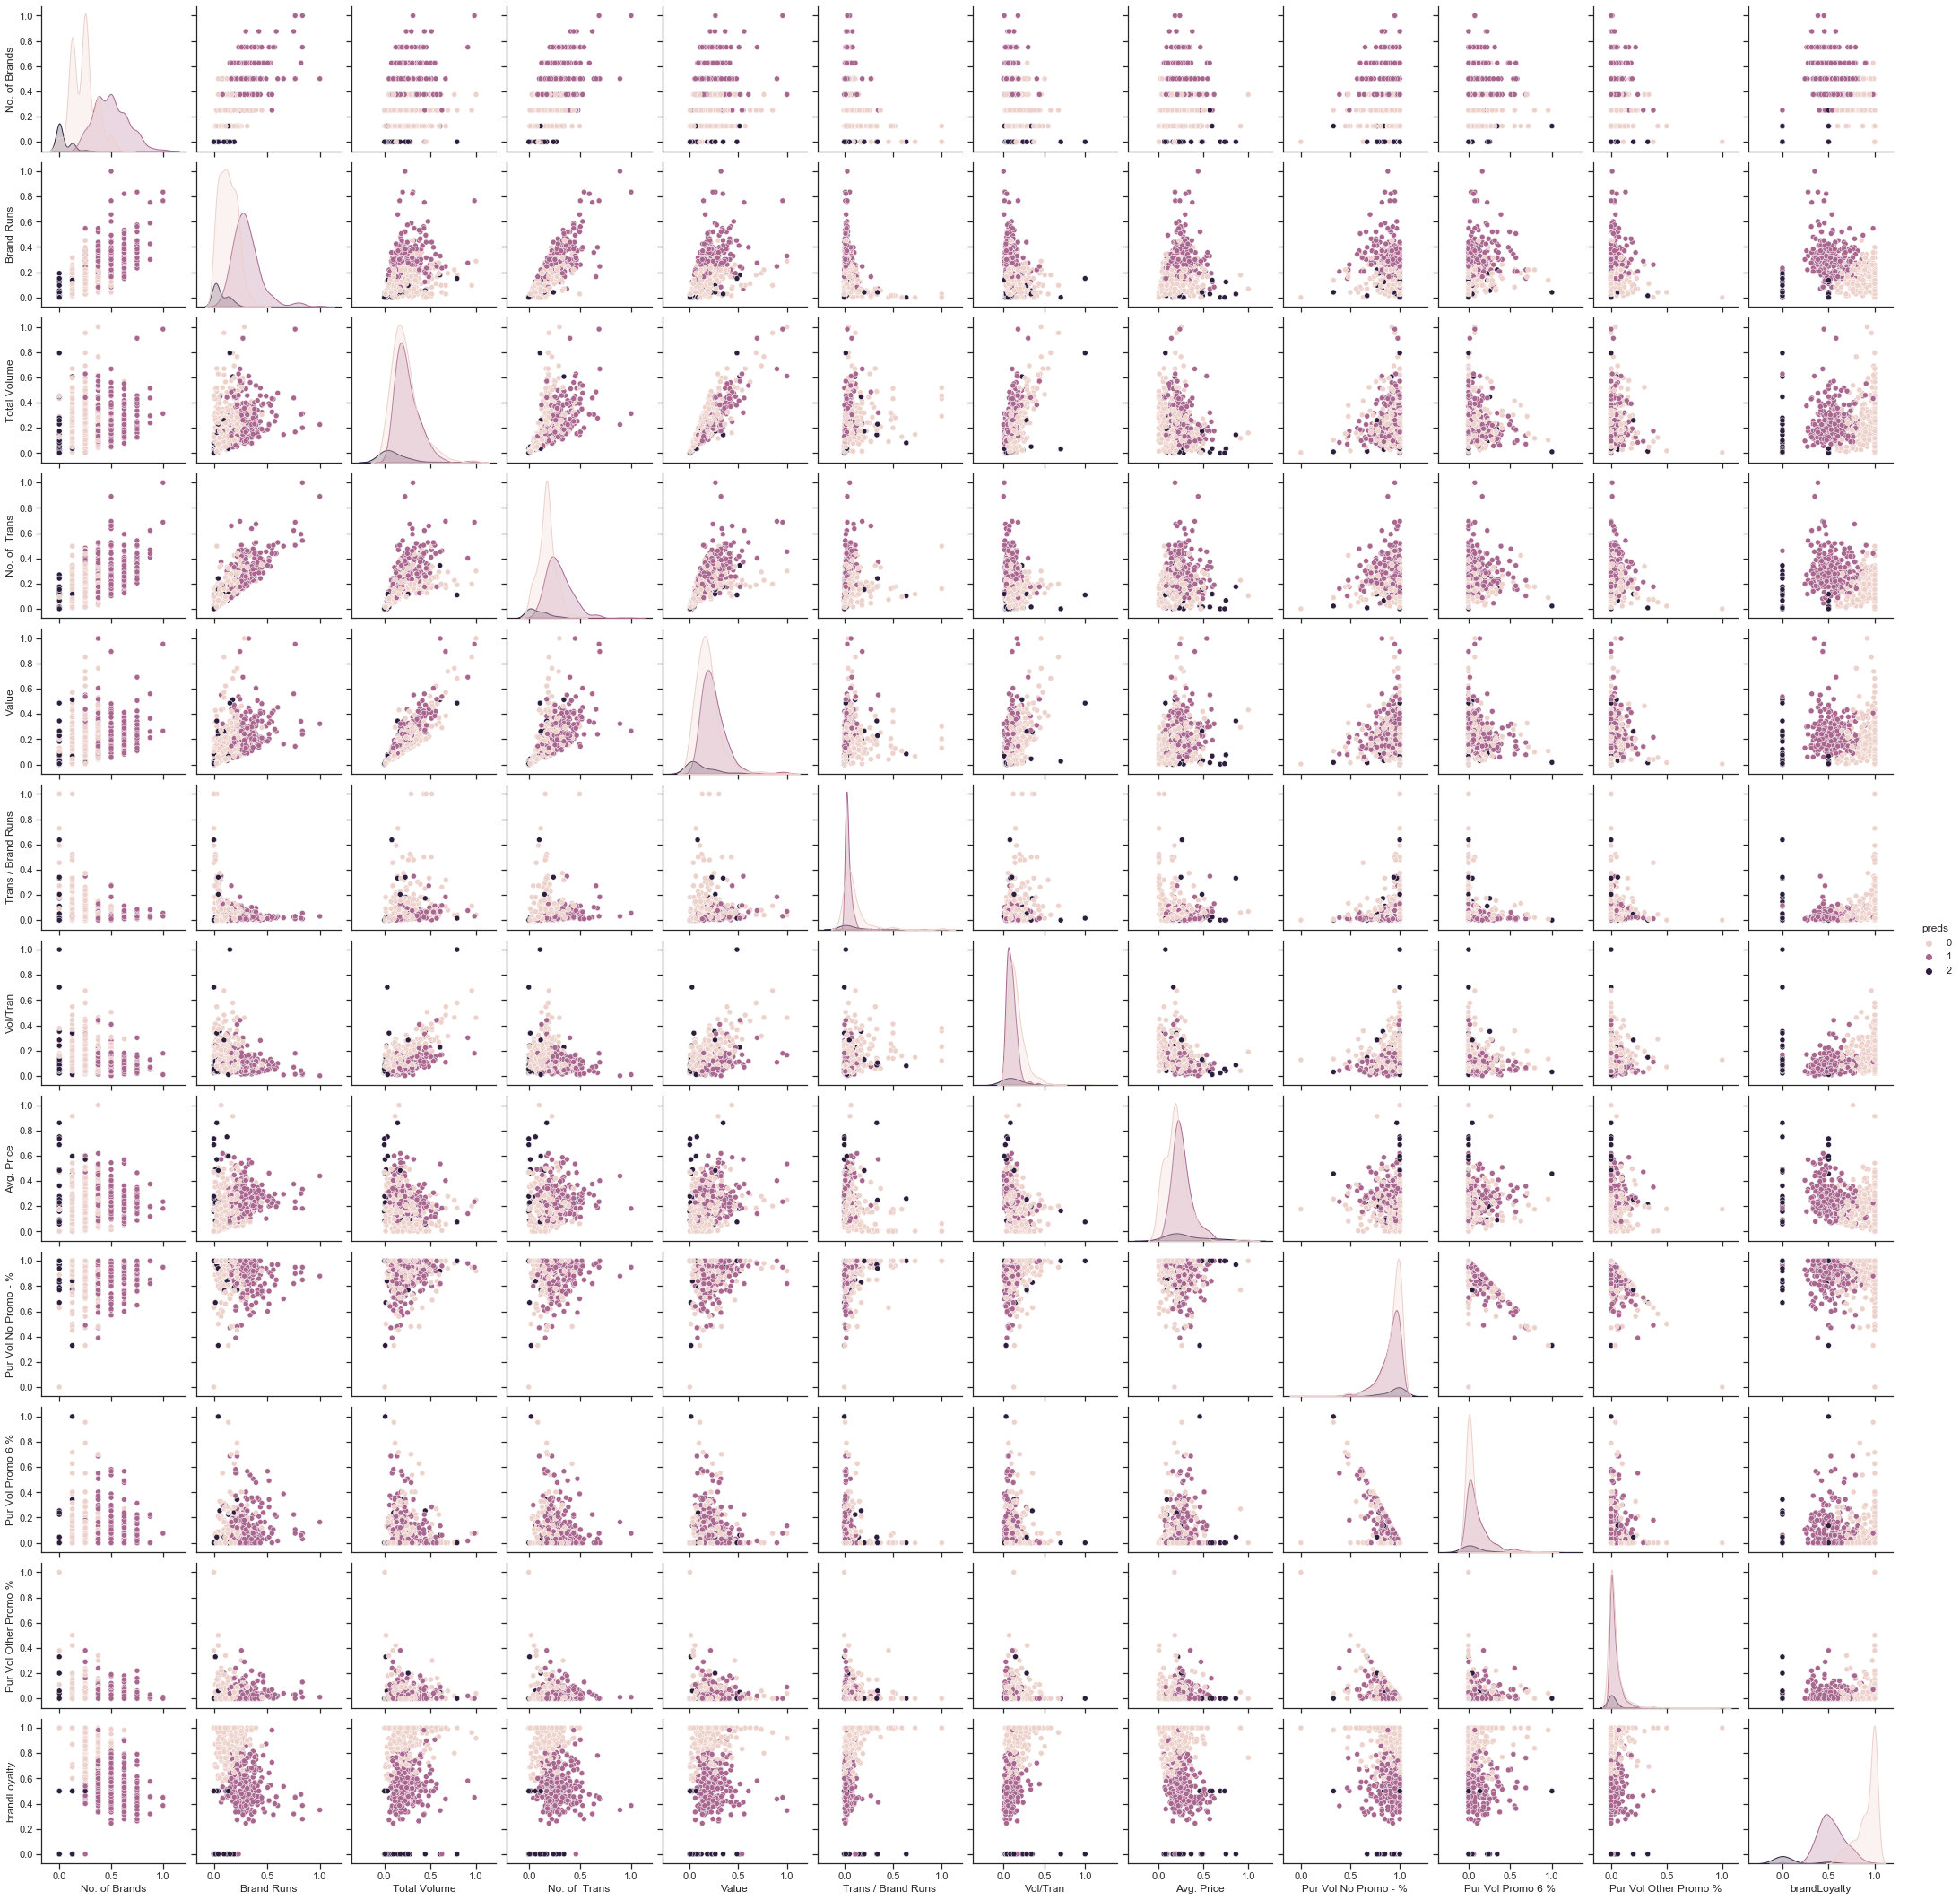

In [342]:
sns.pairplot(purchaseBehaviorDerived, hue='preds')

Thrift Shoppers tend to be less affluent, older, and lower educated.
Loyal Customers tend to be less affluent, younger, and less educated.
Avg Customers tend to be more affluent, mid-old aged, and more highly educated. 

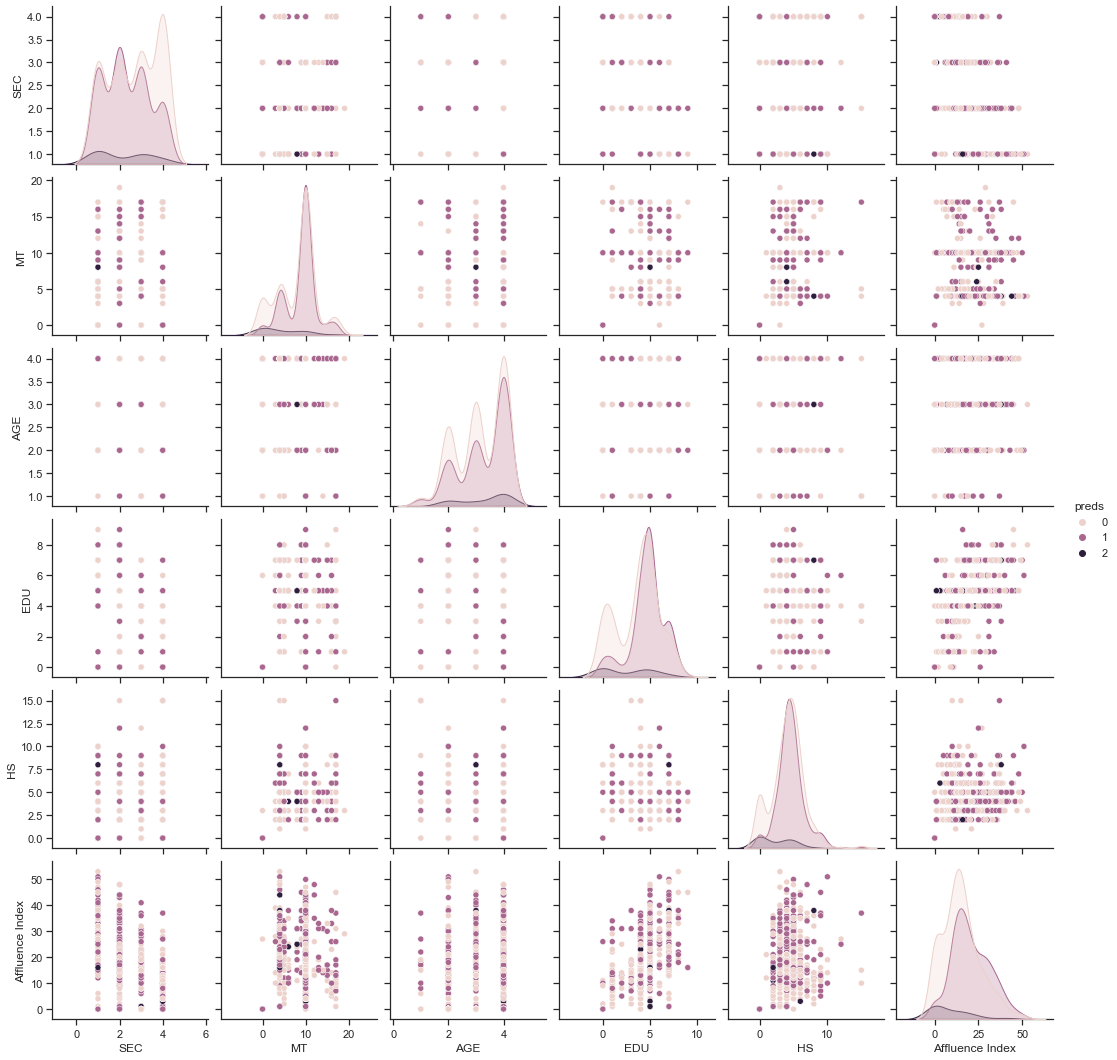

In [343]:
sns.pairplot(demos, hue='preds')

Thrift Shoppers: Favor price categories 1 & 2
Avg Customers: Favor price categories 1, 2 & 3
Loyal Customers: Favor price categories 3 & 4 

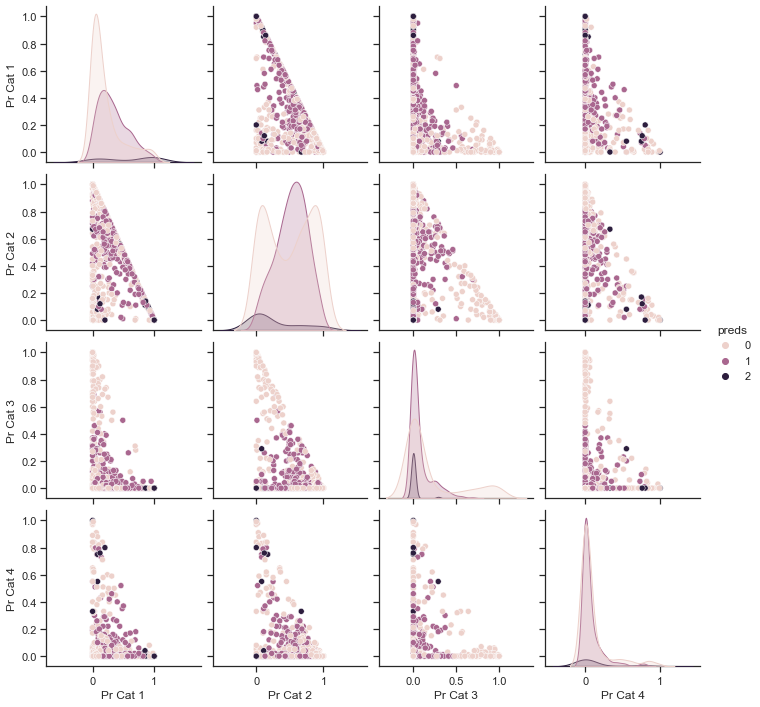

In [344]:
sns.pairplot(priceCat, hue='preds')

Loyal Customers strongly dislike proposition category 13.
They favor Category 14 over all the other categories.

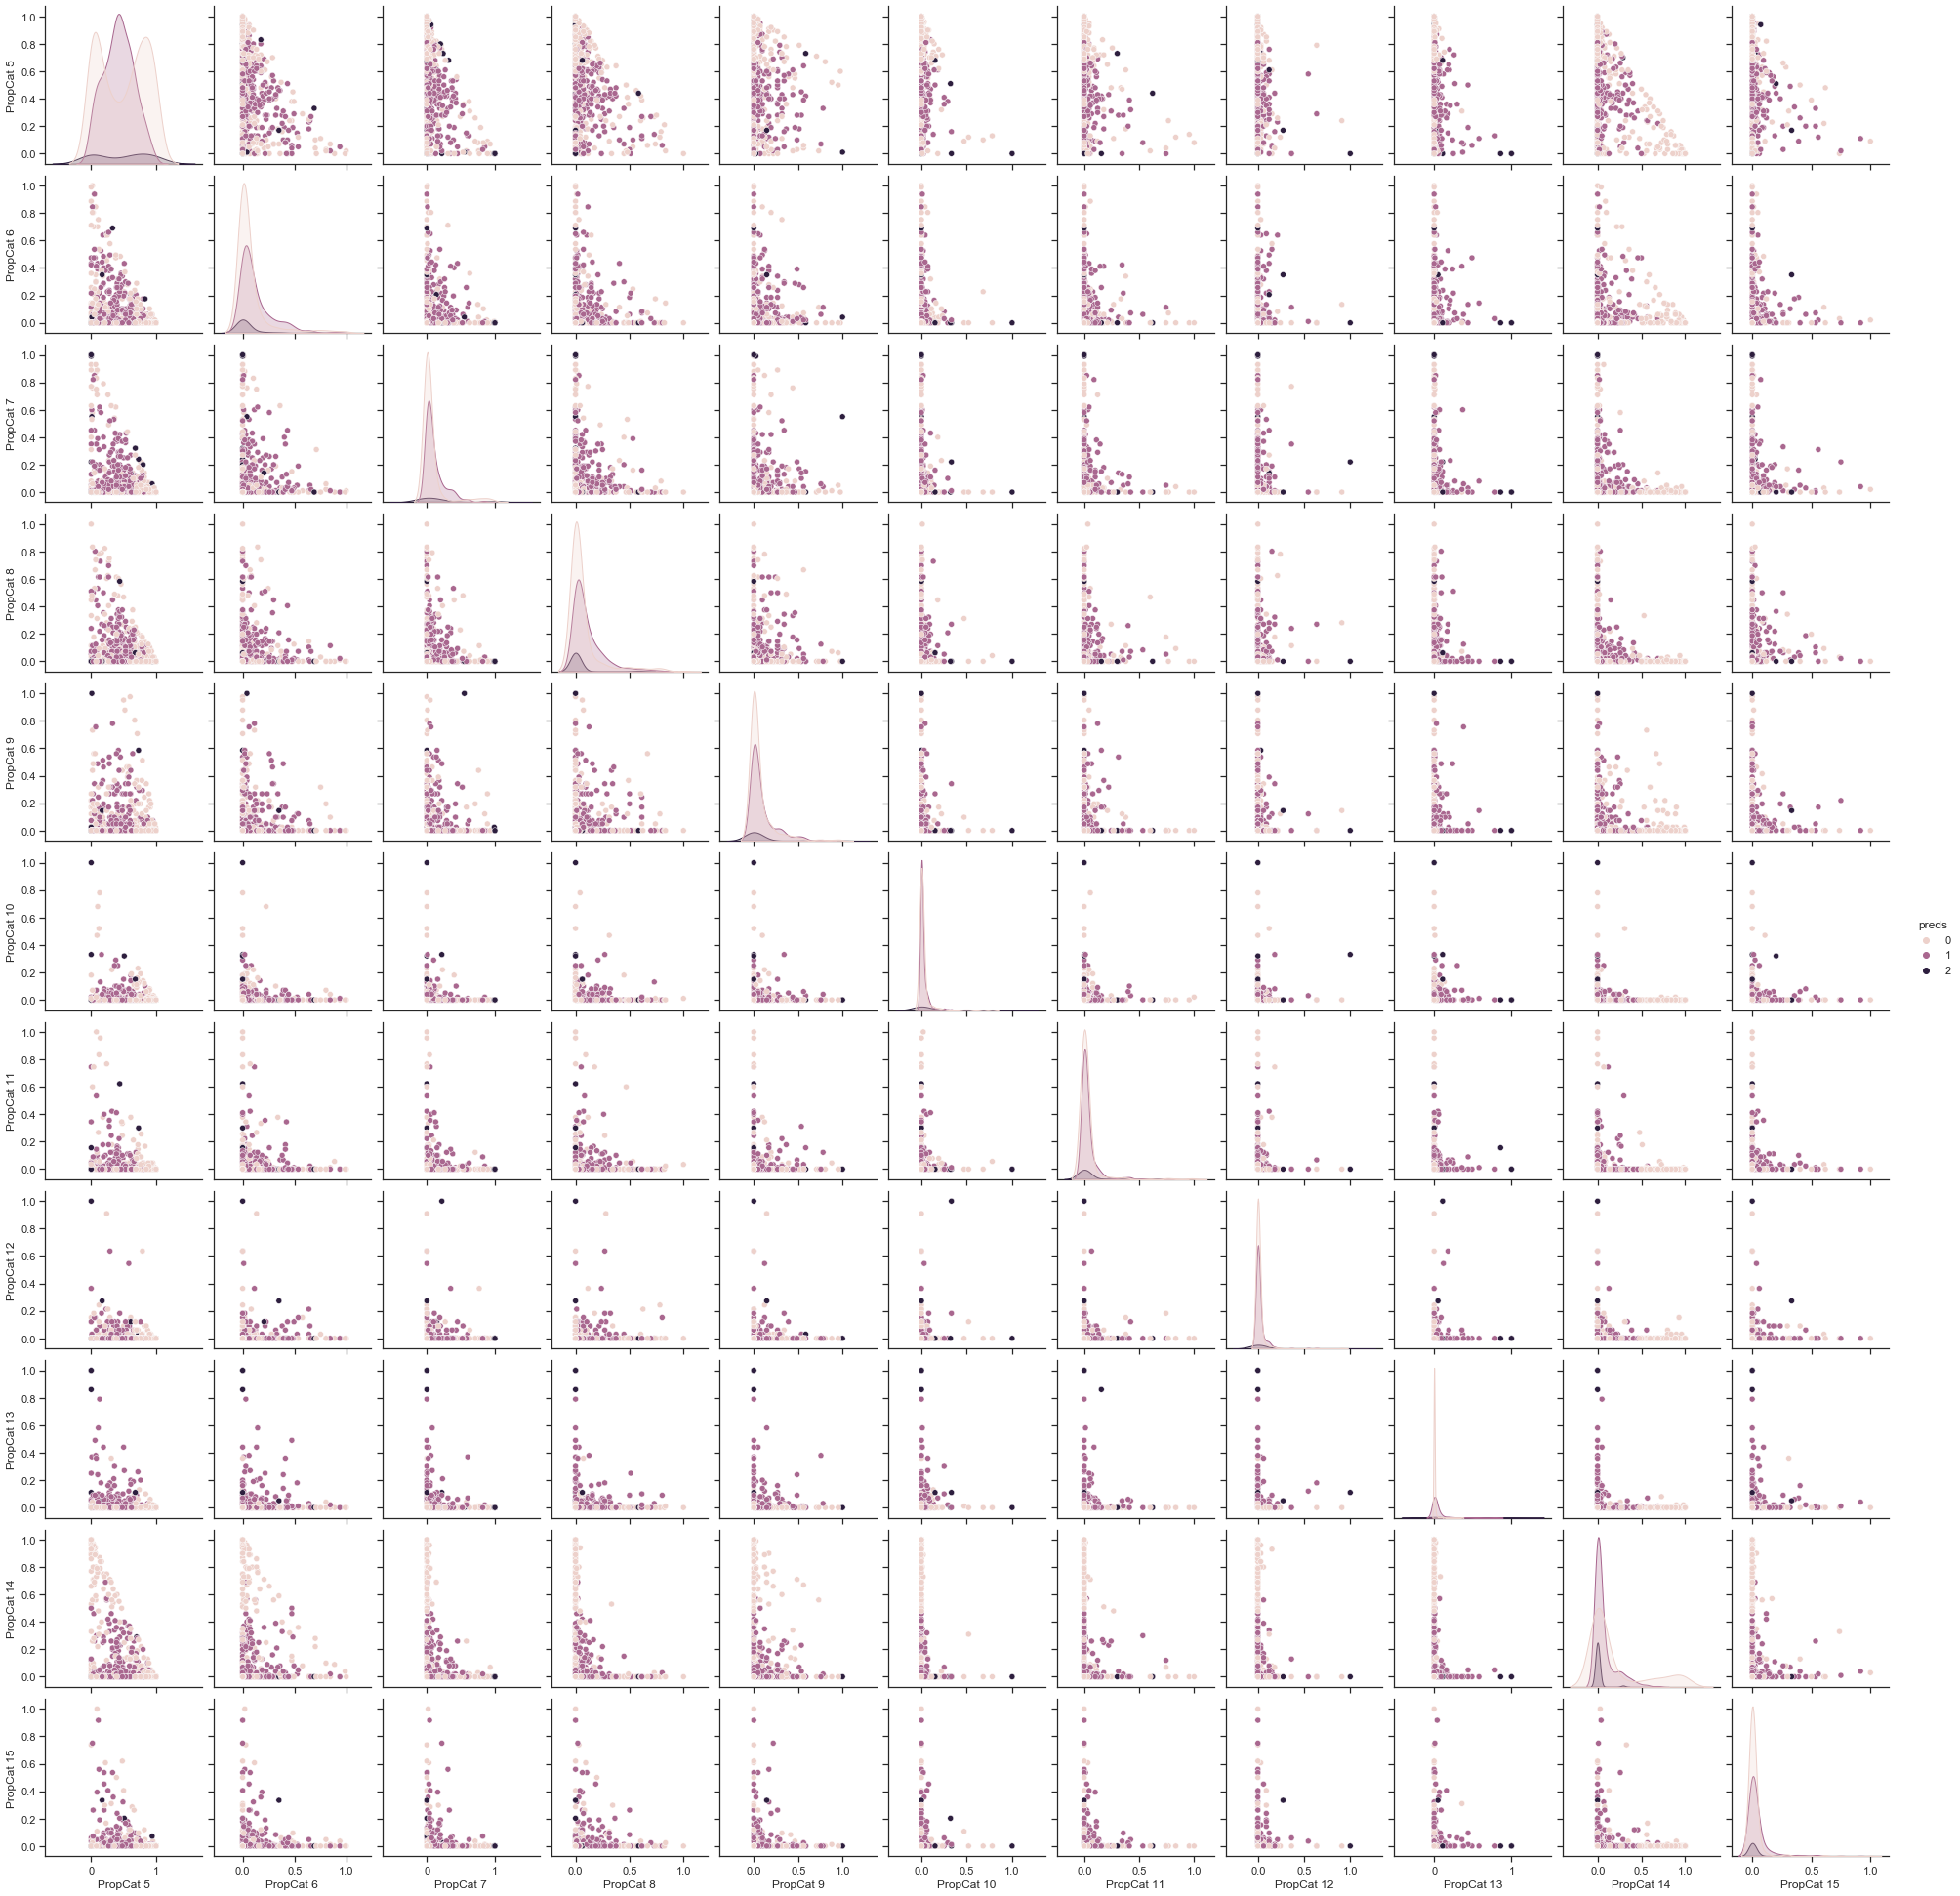

In [345]:
sns.pairplot(propCat, hue='preds')